<a href="https://colab.research.google.com/github/LunaPedro17/IA/blob/main/Arboles_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#DATOS DE TITANIC
import pandas as pd
datos = pd.read_csv("U4_04_train.csv")

In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

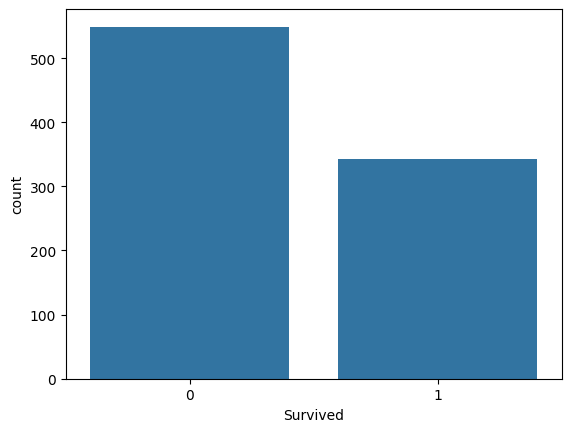

In [4]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

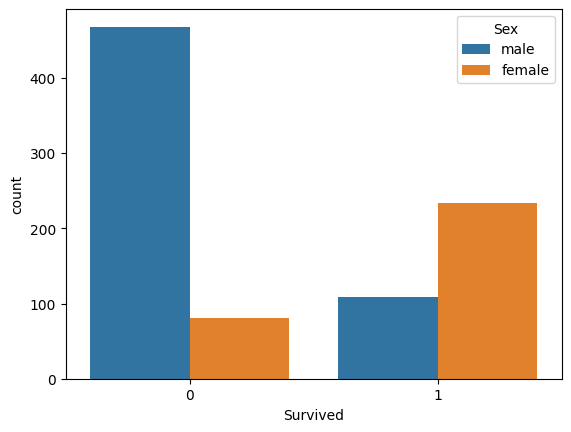

In [5]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [6]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


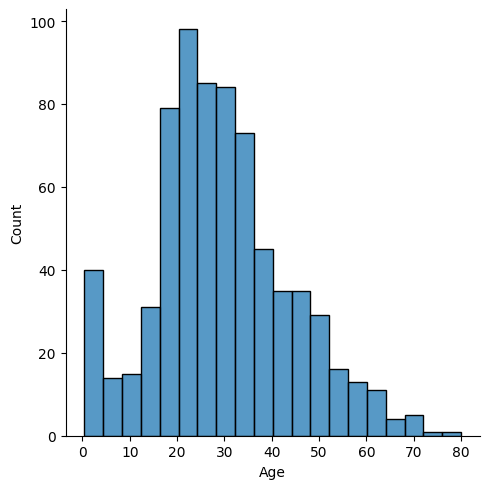

In [7]:
sb.displot(x="Age", data=datos)

In [8]:
#llenar edades vacías con el promedio
datos["Age"]=datos["Age"].fillna(datos["Age"].mean())

In [9]:
datos["Age"]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [10]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
datos= datos.drop(["Cabin"],axis=1)

In [12]:
datos["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [13]:
datos=datos.dropna()

In [14]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
datos = datos.drop(["Name","Ticket"],axis=1)

In [16]:
datos = datos.drop(["PassengerId"],axis=1)

In [17]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
dumies_sex=pd.get_dummies(datos["Sex"],dtype=int, drop_first=True)

In [19]:
datos=datos.join(dumies_sex)
datos=datos.drop(["Sex"],axis=1)

<Axes: xlabel='Survived', ylabel='count'>

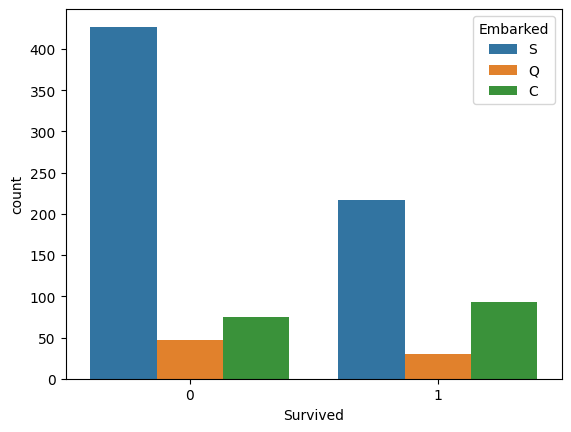

In [20]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [21]:
dumies_embarked=pd.get_dummies(datos["Embarked"],dtype=int, drop_first=True)

In [22]:
datos=datos.join(dumies_embarked)
datos=datos.drop(["Embarked"],axis=1)

In [23]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

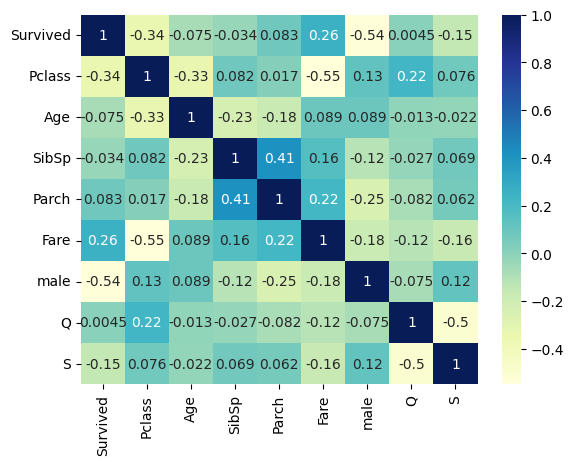

In [24]:
sb.heatmap(datos.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

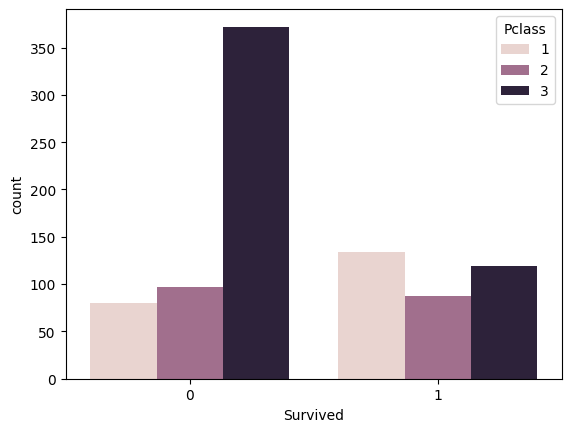

In [25]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [26]:
x=datos.drop(["Survived"],axis=1)
y=datos["Survived"]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [28]:
from sklearn.tree import DecisionTreeClassifier
arbol=DecisionTreeClassifier(max_depth=50)
arbol.fit(x_train,y_train)
predicciones=arbol.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicciones)

0.7921348314606742

In [33]:
from sklearn.tree import DecisionTreeClassifier

resultados=[]
for i in range(1,15):
  arbol=DecisionTreeClassifier(max_depth=i)
  arbol.fit(x_train,y_train)
  predicciones=arbol.predict(x_test)
  exactitud=accuracy_score(y_test,predicciones)
  print(f"Exactitud con max_depth={i}: {exactitud}")
  resultados.append(exactitud)

Exactitud con max_depth=1: 0.8314606741573034
Exactitud con max_depth=2: 0.797752808988764
Exactitud con max_depth=3: 0.848314606741573
Exactitud con max_depth=4: 0.7752808988764045
Exactitud con max_depth=5: 0.8426966292134831
Exactitud con max_depth=6: 0.848314606741573
Exactitud con max_depth=7: 0.8539325842696629
Exactitud con max_depth=8: 0.8370786516853933
Exactitud con max_depth=9: 0.8314606741573034
Exactitud con max_depth=10: 0.8033707865168539
Exactitud con max_depth=11: 0.8370786516853933
Exactitud con max_depth=12: 0.8146067415730337
Exactitud con max_depth=13: 0.8202247191011236
Exactitud con max_depth=14: 0.8033707865168539


<Axes: >

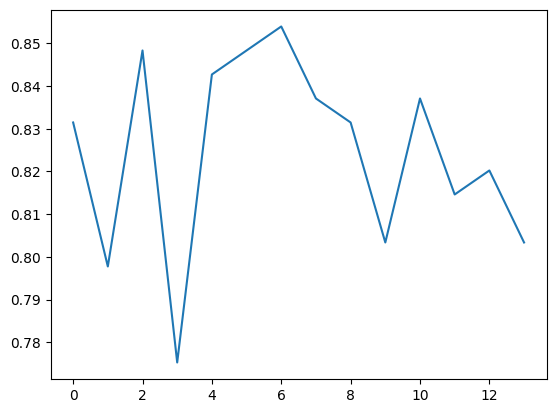

In [34]:
sb.lineplot(data=resultados)

In [35]:
arbol=DecisionTreeClassifier(max_depth=7)
arbol.fit(x_train,y_train)
predicciones=arbol.predict(x_test)
exactitud=accuracy_score(y_test,predicciones)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       102
           1       0.88      0.76      0.82        76

    accuracy                           0.85       178
   macro avg       0.86      0.84      0.85       178
weighted avg       0.86      0.85      0.85       178



In [37]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,94,8
Real: Si,18,58


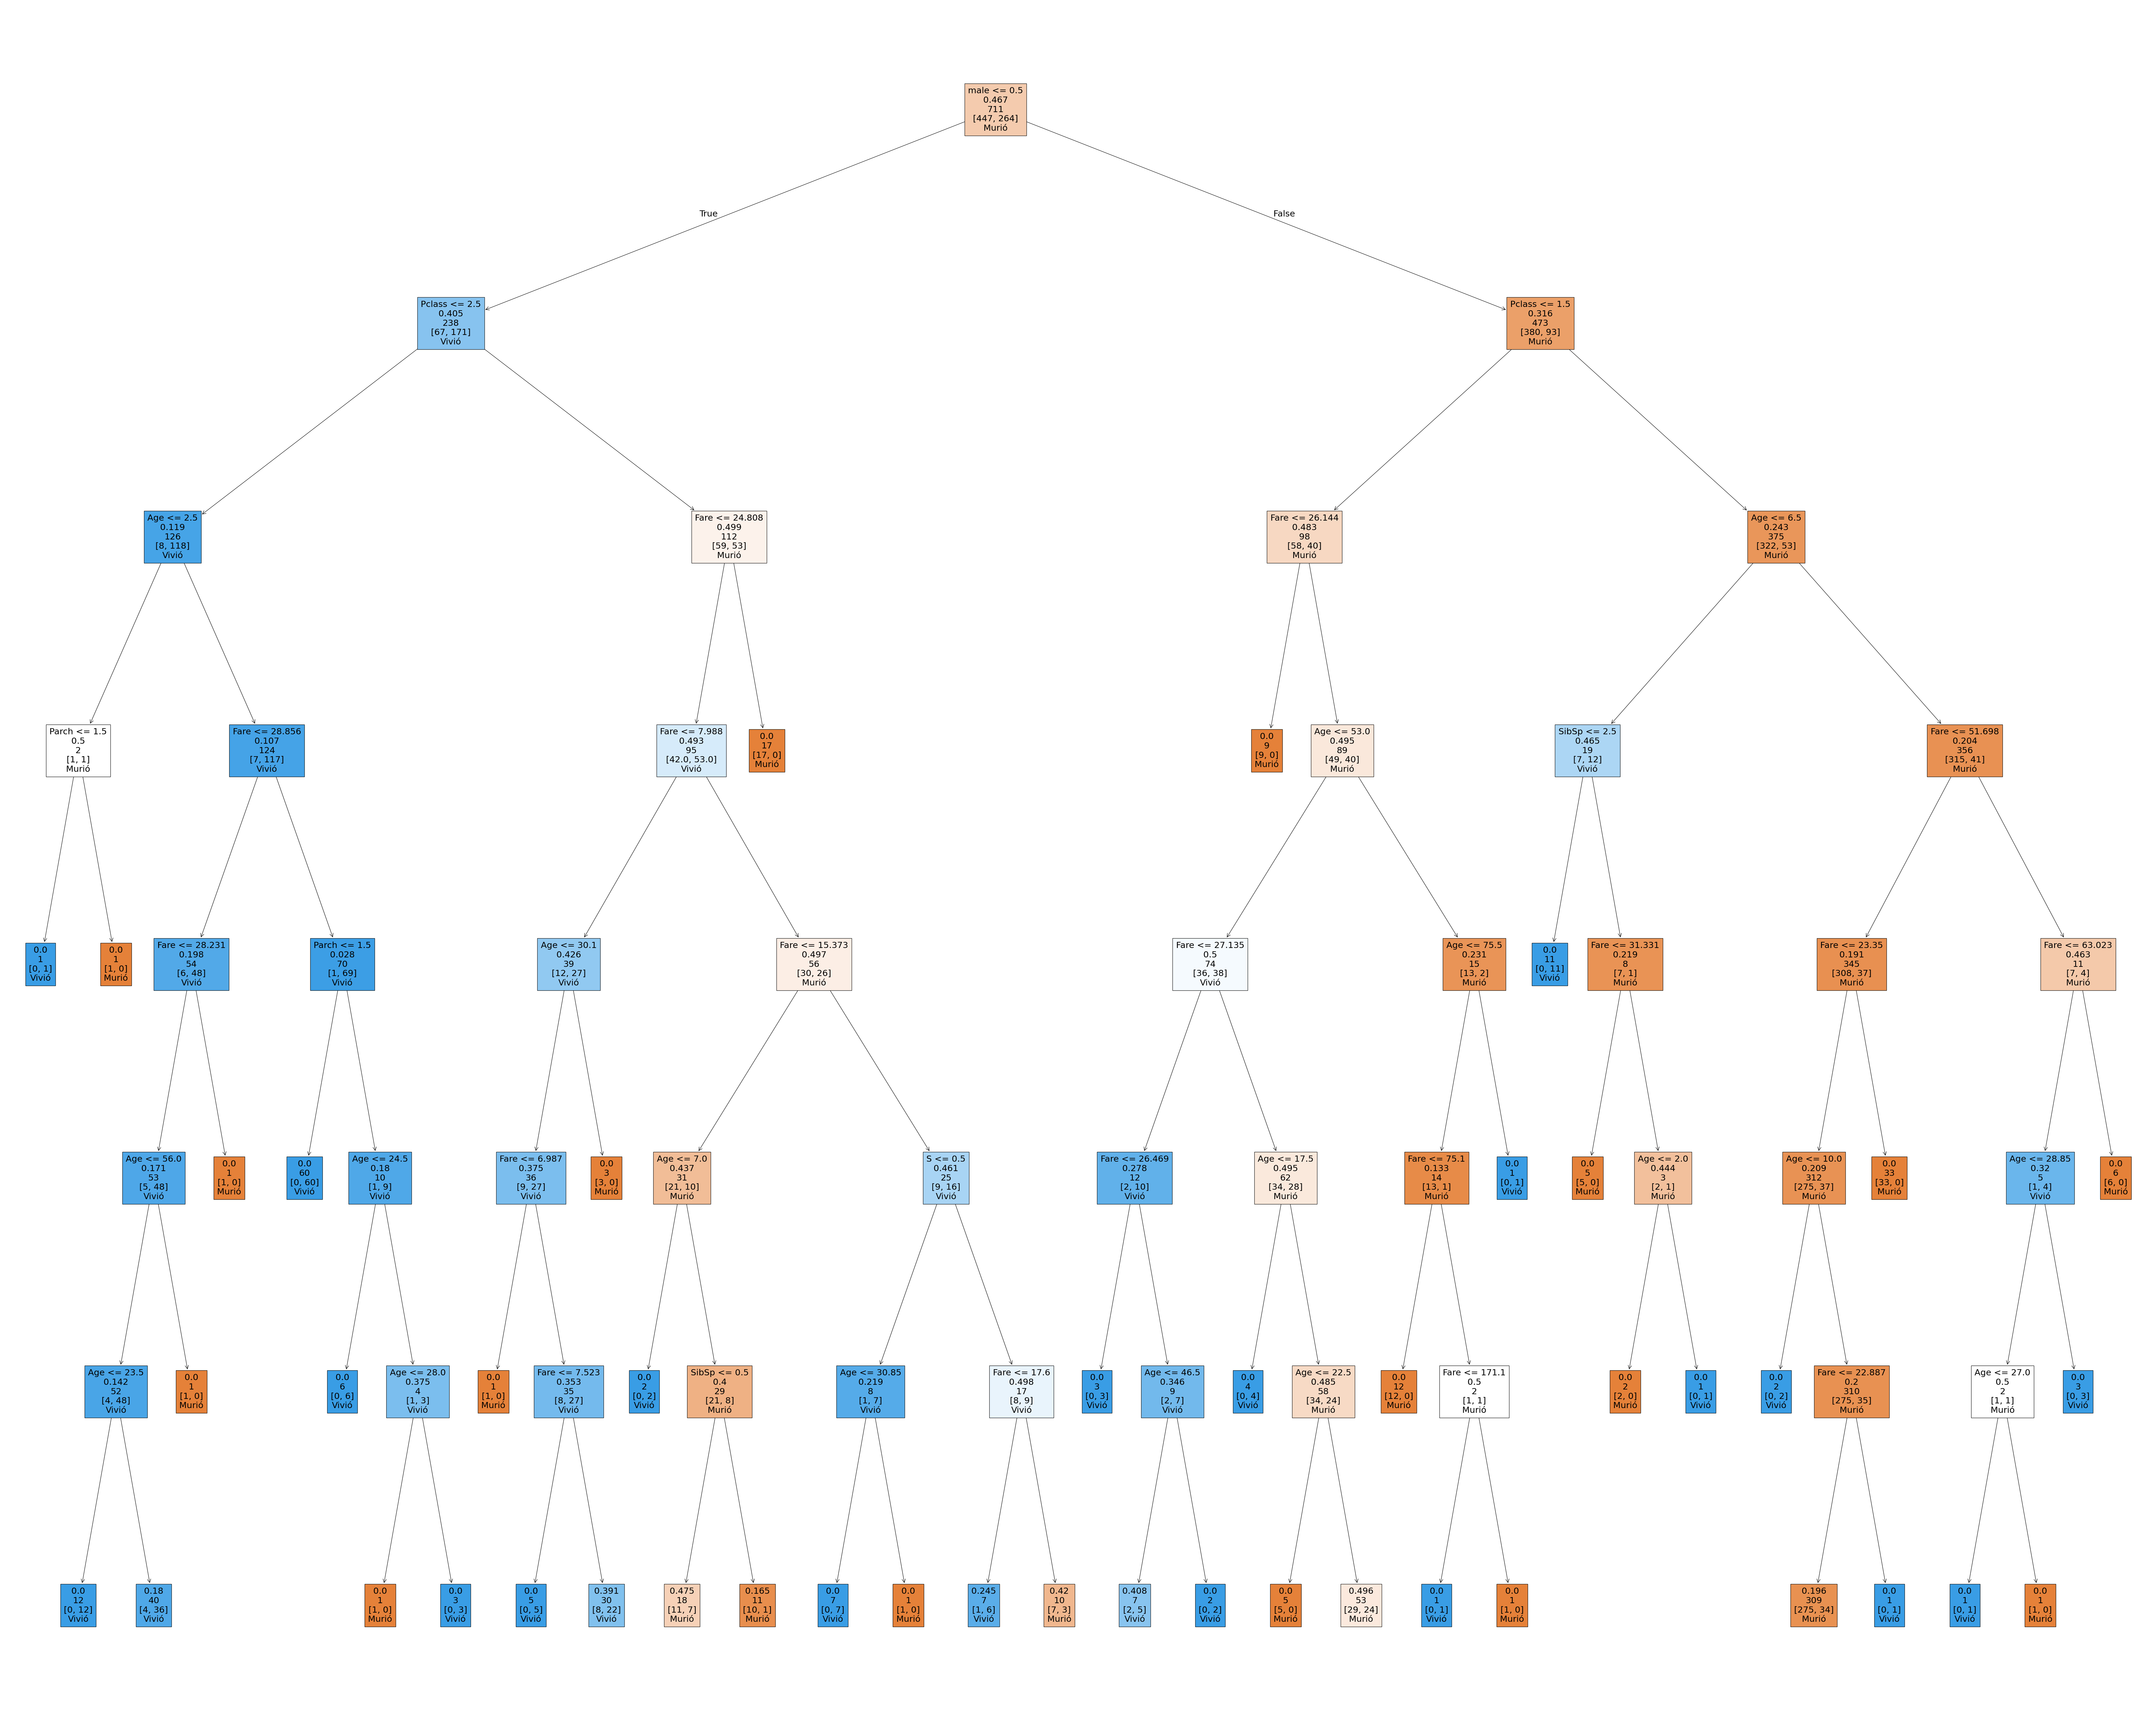

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(arbol, feature_names=x_train.columns, class_names=["Murió","Vivió"], filled=True, label="none")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicciones))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.78      0.78      0.78        68

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicciones)

array([[95, 15],
       [15, 53]])

In [ ]:
pd.DataFrame(confusion_matrix(y_test,predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,95,15
Real: Si,15,53


In [ ]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
persona=[1,35,0,0,80,1,0,0]
prediccion=lr.predict([persona])
if prediccion[0]==1:
  print("Sobrevivió")
else:
  print("No sobrevivió")

Sobrevivió


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
